In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [19]:
df = pd.read_csv('data_inflasi.csv', sep=';')
df

,Bulan,Inflasi
0,2011-01,0.0702
1,2011-02,0.0684
2,2011-03,0.0665
3,2011-04,0.0616
4,2011-05,0.0598
...,...,...
151,2023-08,0.0327
152,2023-09,0.0228
153,2023-10,0.0256
154,2023-11,0.0286


In [20]:
print(df.dtypes)

Bulan       object
Inflasi    float64
dtype: object


In [21]:
#change to datetimeindex
datetimeindex = pd.to_datetime([f'{m_y.split("-")[0]}-{m_y.split("-")[1]}-01' for m_y in df['Bulan']])

In [22]:
df['Bulan'] = datetimeindex

In [23]:
df = df.set_index('Bulan')
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Bulan', length=156, freq=None)

In [24]:
y = df['Inflasi'].resample('MS').mean()

In [25]:
y['2011':]

Bulan
2011-01-01    0.0702
2011-02-01    0.0684
2011-03-01    0.0665
2011-04-01    0.0616
2011-05-01    0.0598
               ...  
2023-08-01    0.0327
2023-09-01    0.0228
2023-10-01    0.0256
2023-11-01    0.0286
2023-12-01    0.0261
Freq: MS, Name: Inflasi, Length: 156, dtype: float64

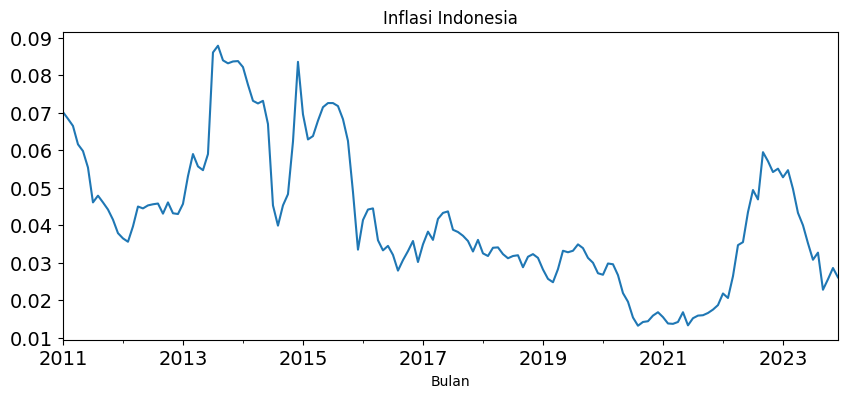

In [32]:
y.plot(figsize=(10, 4), title='Inflasi Indonesia', fontsize=14)
plt.show()

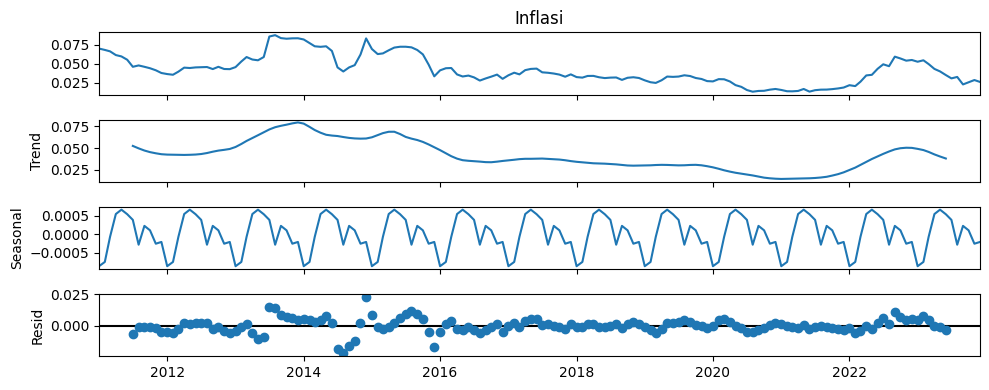

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [35]:
import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'